In [87]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_dataset = pd.merge(study_results ,mouse_metadata , on="Mouse ID" , how="outer")
# Display the data table for preview
merged_dataset.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [88]:
# Checking the number of mice.
merged_dataset["Mouse ID"].nunique()

249

In [89]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = merged_dataset.loc[merged_data.duplicated(subset= ["Mouse ID" , "Timepoint"]), "Mouse ID"].unique()
duplicate_mice

array(['g989'], dtype=object)

In [90]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice=merged_dataset.loc[merged_dataset["Mouse ID"] == "g989", :]
duplicate_mice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [91]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data=merged_dataset.drop(merged_dataset[merged_dataset["Mouse ID"] == "g989"].index, inplace = False)
clean_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [92]:
# Checking the number of mice in the clean DataFrame.
clean_data["Mouse ID"].nunique()

248

## Summary Statistics

In [93]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean=clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median=clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance=clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
standard_deviation=clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
SEM=clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

summary_df=pd.DataFrame({"Mean Tumor Volume":mean,
                      "Median Tumor Volume": median,
                      "Tumor Volume Variance": variance,
                      "Tumor Volume Std. Dev.": standard_deviation,
                      "Tumor Volume Std. Err.":SEM})
summary_df



,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [94]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
Summary_stat_table=clean_data.groupby("Drug Regimen").agg({'Tumor Volume (mm3)': ['mean','median','var','std','sem']})                                                                 
Summary_stat_table

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

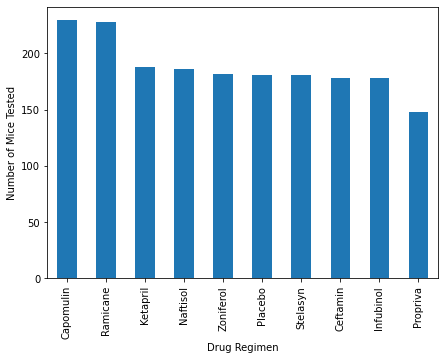

In [95]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
Bar_data=clean_data.groupby("Drug Regimen")["Timepoint"].count()
bar_data=Bar_data.sort_values(ascending=False)
bar_plot=bar_data.plot(kind="bar" , figsize=(7,5))
bar_plot.set_ylabel("Number of Mice Tested")
plt.show()

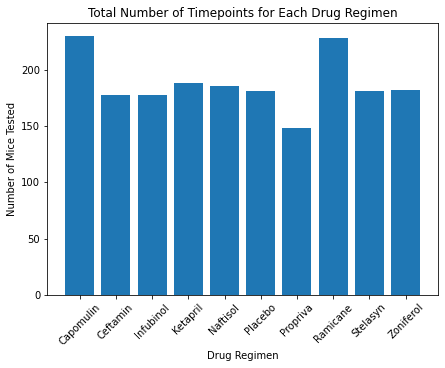

In [96]:
# # Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
regimen_timepoints = clean_data.groupby('Drug Regimen')['Timepoint'].count()

# Create a bar plot
plt.figure(figsize=(7, 5))  
plt.bar(regimen_timepoints.index, regimen_timepoints.values)

# Set the labels and title
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice Tested')
plt.title('Total Number of Timepoints for Each Drug Regimen')

# Rotate the x-axis labels
plt.xticks(rotation=45)
plt.show()




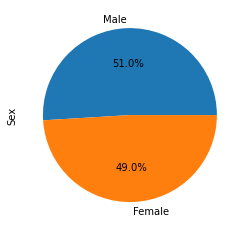

In [97]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pie_data=clean_data["Sex"].value_counts()
pie_plot=pie_data.plot(kind="pie", autopct="%1.1f%%")


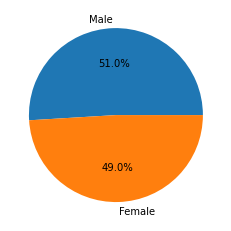

In [98]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_counts = clean_data['Sex'].value_counts()
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%')
plt.show()



## Quartiles, Outliers and Boxplots

In [99]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoints = clean_data.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_tumor_df = pd.merge(last_timepoints, clean_data, on=['Mouse ID', 'Timepoint'], how='left')
merged_tumor_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [100]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    treatment_data = clean_data[clean_data['Drug Regimen'] == treatment]['Tumor Volume (mm3)']    
    tumor_volume.append(treatment_data) 
    
# Determine outliers using upper and lower bounds
    quartiles = treatment_data.quantile([0.25, 0.5, 0.75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    iqr = upper_q - lower_q
    lower_bound = lower_q - 1.5 * iqr
    upper_bound = upper_q + 1.5 * iqr
    outliers = treatment_data[(treatment_data < lower_bound) | (treatment_data > upper_bound)]
    
    print(f"IQR for {treatment}:{iqr}")
    print(f"The lower quartile of {treatment} is: {lower_q}")
    print(f"The upper quartile of {treatment} is: {upper_q}")
#     print(f"The interquartile range of {treatment} is: {iqr}")
    print(f"lower_bound {lower_bound} could be outliers.")
    print(f"upper_bound {upper_bound} could be outliers.")
    print(f"Number of outliers for {treatment} is {outliers}.")
    print(f"---------------------------------------")

IQR for Capomulin:7.314067135000002
The lower quartile of Capomulin is: 37.685932865
The upper quartile of Capomulin is: 45.0
lower_bound 26.714832162499995 could be outliers.
upper_bound 55.9711007025 could be outliers.
Number of outliers for Capomulin is 1699    25.472143
1700    23.343598
Name: Tumor Volume (mm3), dtype: float64.
---------------------------------------
IQR for Ramicane:8.325365415
The lower quartile of Ramicane is: 36.674634585
The upper quartile of Ramicane is: 45.0
lower_bound 24.1865864625 could be outliers.
upper_bound 57.488048122500004 could be outliers.
Number of outliers for Ramicane is 514    22.050126
Name: Tumor Volume (mm3), dtype: float64.
---------------------------------------
IQR for Infubinol:10.002090667500006
The lower quartile of Infubinol is: 47.3123533
The upper quartile of Infubinol is: 57.314443967500004
lower_bound 32.309217298749985 could be outliers.
upper_bound 72.31757996875001 could be outliers.
Number of outliers for Infubinol is Serie

C:\Users\cyeun\anaconda3\envs\PythonData\lib\site-packages\matplotlib\cbook\__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


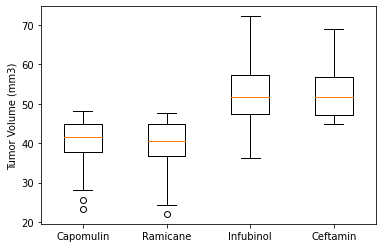

In [101]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

fig, ax = plt.subplots()
ax.boxplot(tumor_volume)
ax.set_xticklabels(treatments)
ax.set_ylabel('Tumor Volume (mm3)')
plt.show()


## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

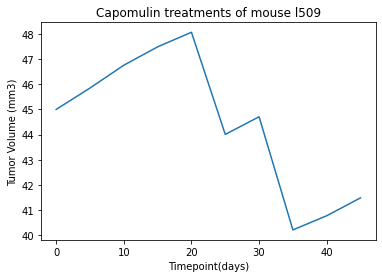

In [102]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

mouse_l509=clean_data.loc[clean_data["Mouse ID"] == "l509"]
capomulin__mouse=mouse_l509.loc[mouse_l509["Drug Regimen"]== "Capomulin"]
plt.plot(capomulin__mouse["Timepoint"] , capomulin__mouse ["Tumor Volume (mm3)"])
plt.title("Capomulin treatments of mouse l509")
plt.xlabel("Timepoint(days)")
plt.ylabel("Tumor Volume (mm3)")

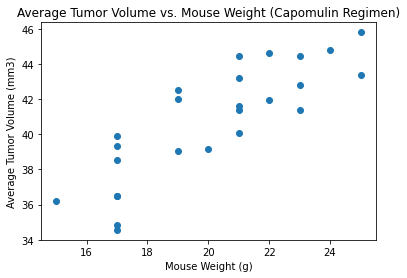

In [103]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

capomulin = clean_data[clean_data['Drug Regimen'] == 'Capomulin']
ave_tumor_vol = capomulin.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weight = capomulin.groupby('Mouse ID')['Weight (g)'].mean()

plt.scatter(mouse_weight, ave_tumor_vol)
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Average Tumor Volume vs. Mouse Weight (Capomulin Regimen)')
plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


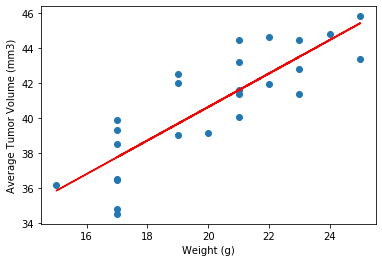

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

